In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import train_test_split   
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.metrics import confusion_matrix           
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\MACHINE LEARNING\heartdataset.csv")

In [4]:
df.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Step 1: Encode Categorical Features
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 2: Handle Missing Values (if any, in this case none)
# No action needed as confirmed earlier

# Step 3: Normalize/Standardize Numerical Features
scaler = StandardScaler()
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 4: Split Data into Features and Target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Split into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify preprocessed data
X_train.head(), y_train.head()

(          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
 82   1.013608    1              0   0.942326     0.332163          0   
 51  -0.654147    0              0  -0.668619     0.180099          0   
 220 -0.758382    1              0  -0.131637     0.323715          0   
 669 -0.862617    0              1  -0.131637     0.425090          0   
 545 -0.549913    1              0  -0.024241     0.746114          0   
 
      RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
 82            1 -0.710956               0 -0.811357         1  
 51            1 -1.397397               1  1.160006         1  
 220           1 -0.832093               0 -0.811357         1  
 669           0  1.711775               0 -0.219948         1  
 545           2  0.258136               0 -0.614220         2  ,
 82     1
 51     1
 220    1
 669    0
 545    0
 Name: HeartDisease, dtype: int64)

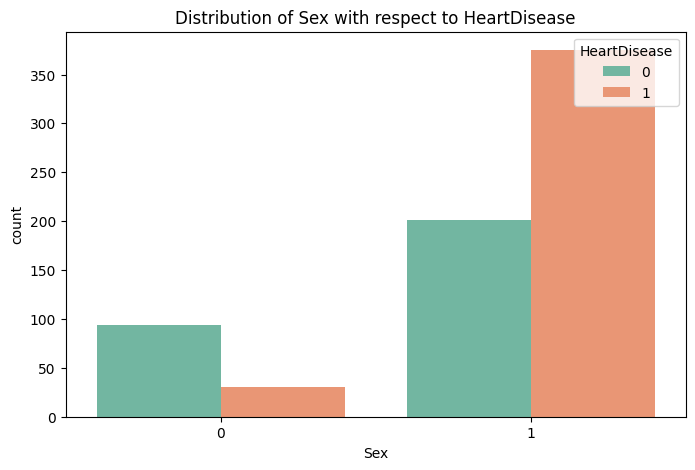

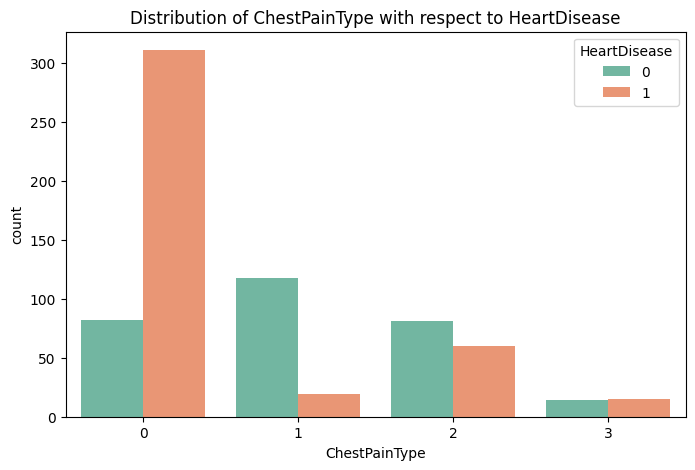

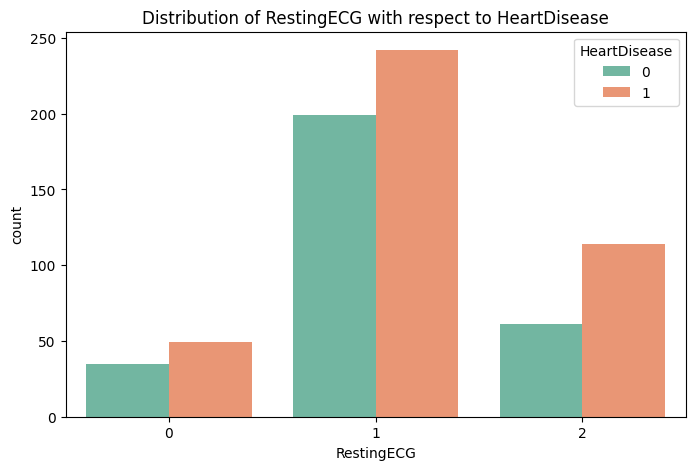

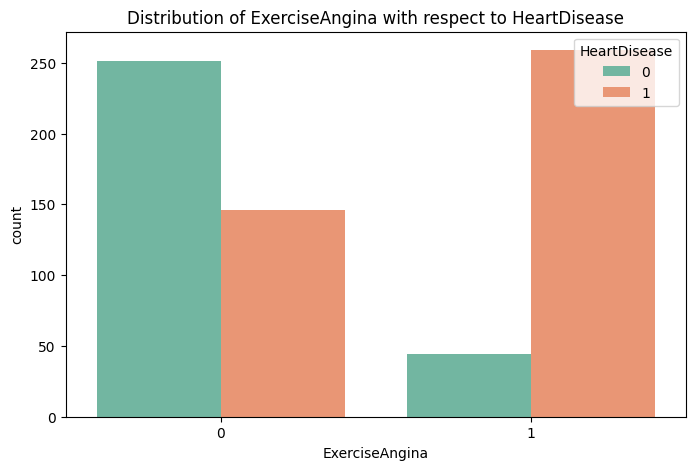

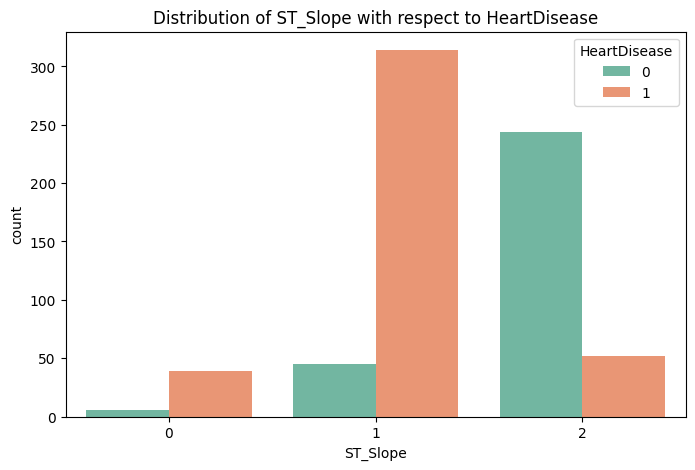

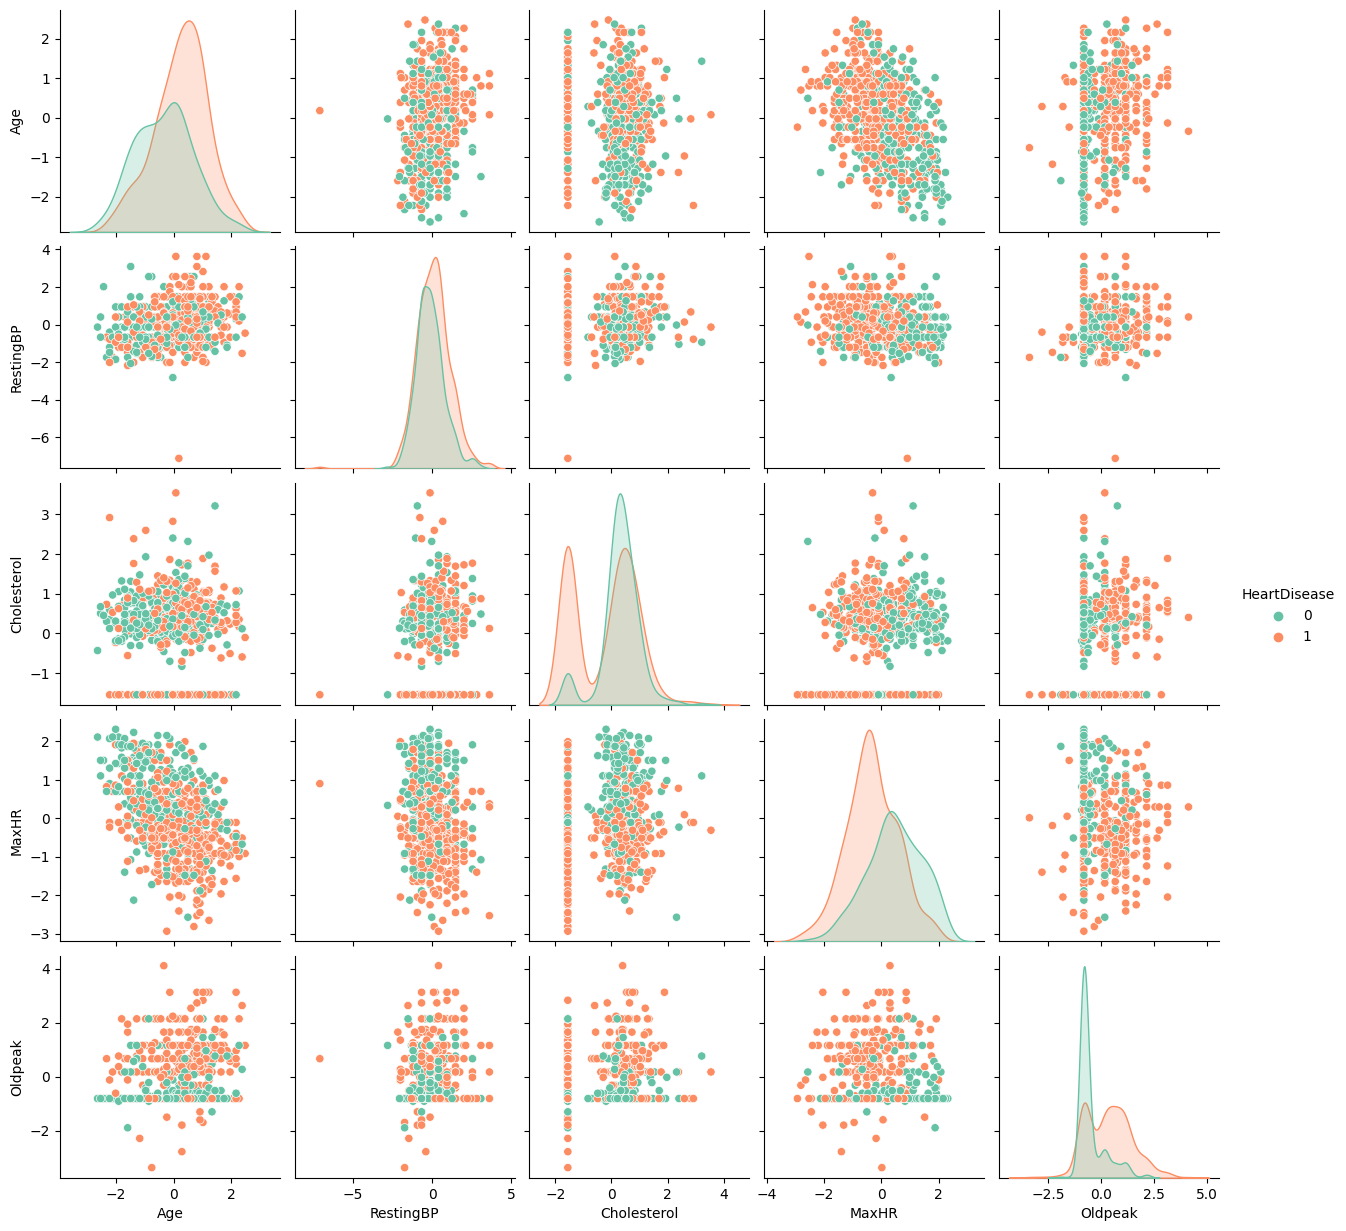

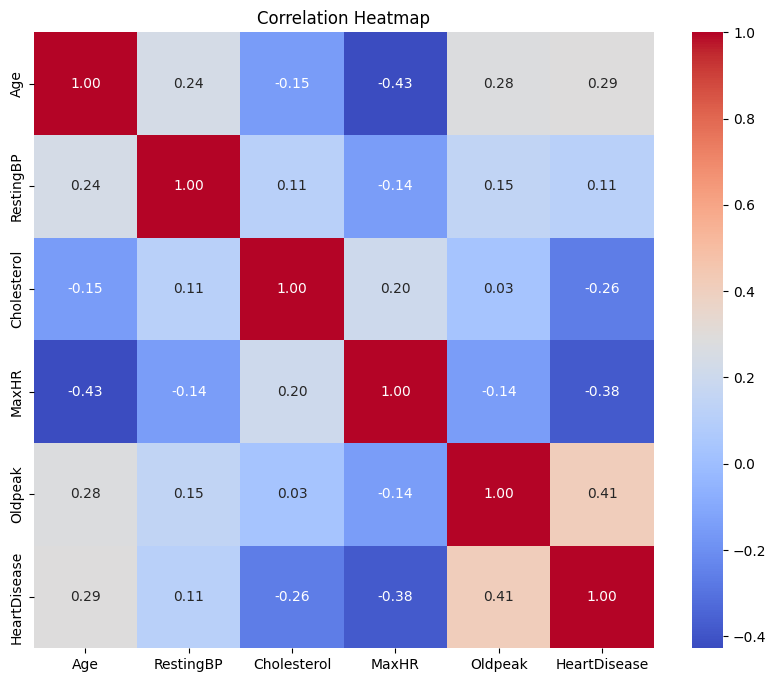

In [6]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Encode categorical variables for analysis
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define EDA functions
def categorical_eda(data, categorical_cols, target_col='HeartDisease'):
    """Perform categorical EDA."""
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, data=data, hue=target_col, palette='Set2')
        plt.title(f"Distribution of {col} with respect to {target_col}")
        plt.legend(title=target_col, loc='upper right')
        plt.show()

def numerical_eda(data, numerical_cols, target_col='HeartDisease'):
    """Perform numerical EDA."""
    # Pairplot for distributions and correlations
    sns.pairplot(data[numerical_cols + [target_col]], hue=target_col, diag_kind='kde', palette='Set2')
    plt.show()
    
    # Correlation heatmap
    correlation_matrix = data[numerical_cols + [target_col]].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Perform categorical EDA
categorical_eda(df, categorical_cols)

# Perform numerical EDA
numerical_eda(df, numerical_cols)

In [7]:
# Setup a knn classifier with k neighbors=1

knn = KNeighborsClassifier(n_neighbors=1)

# Fit the KNN model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.

knn.score(X_test,y_test)

0.8428571428571429

In [9]:
#let us get the predictions using the classifier we had fit above.

y_pred = knn.predict(X_test)

In [10]:
# Using confusion matrix.

confusion_matrix(y_test,y_pred)

array([[48, 10],
       [12, 70]], dtype=int64)

In [11]:
# Obtain confusion matrix table.

pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted Fail','Predicted Pass'],index=['Actual Fail','Actual Pass'])

,Predicted Fail,Predicted Pass
Actual Fail,48,10
Actual Pass,12,70


In [12]:
# Obtain Classification Report.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        58
           1       0.88      0.85      0.86        82

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



In [13]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

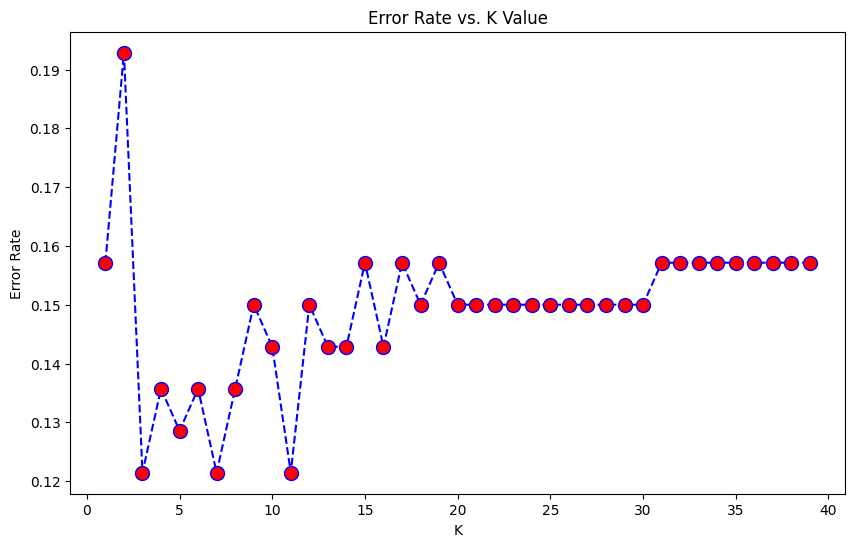

In [14]:
# Plotting the graph for best fitting K value between 1 to 40.

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [15]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: ",knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        58
           1       0.88      0.85      0.86        82

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140

Accuracy:  0.8785714285714286


In [17]:
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the KNN model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [19]:

knn.score(X_test,y_test)

0.8785714285714286

In [20]:
y_pred = knn.predict(X_test)

In [21]:
confusion_matrix(y_test,y_pred)

array([[49,  9],
       [ 8, 74]], dtype=int64)